In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Dataset.csv")

In [3]:
dataset.head()

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2


In [4]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
     

In [5]:
dataset['Date']= le.fit_transform(dataset['Date'])

In [6]:
dataset['Date']= le.fit_transform(dataset['Date'])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          1439 non-null   object
 1   Date         1439 non-null   int64 
 2   CodedDay     1439 non-null   int64 
 3   Zone         1439 non-null   int64 
 4   Weather      1439 non-null   int64 
 5   Temperature  1439 non-null   int64 
 6   Traffic      1439 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.8+ KB


In [8]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 6:7].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
     

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [11]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=300, random_state=0)

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
else:
    y_pred=np.round(y_pred+0.5)

In [14]:
df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 
a=100-df1
print("Accuracy= ",a,"%")

Error =  13.42 %
Accuracy=  86.58 %


In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [16]:
y_pred = regressor.predict(X_test)
y_pred

array([2.48568787, 3.83075078, 3.2936518 , 3.1673047 , 2.92523973,
       2.31572795, 2.36996983, 2.19128844, 3.66497598, 2.56215864,
       3.09770455, 3.37561416, 2.86955855, 2.70819912, 2.51284476,
       2.60066084, 2.4309671 , 2.37138504, 3.18637153, 2.83358309,
       3.60021418, 2.48652871, 3.03685709, 2.39762196, 2.497879  ,
       3.11026378, 2.99161215, 3.69680818, 3.09097039, 2.62917555,
       2.84167464, 3.26385761, 2.957667  , 3.15259094, 3.1129895 ,
       2.65382723, 2.64573348, 4.17701652, 3.1214746 , 2.59892333,
       2.54551056, 3.67757031, 2.76428867, 3.82274378, 3.06953225,
       2.93527699, 2.77584091, 2.67888664, 2.3393692 , 3.94660356,
       2.98060755, 3.72745618, 4.06289067, 3.18461613, 2.79760641,
       3.16032156, 2.40107766, 3.05992469, 2.50326614, 3.14948545,
       2.0258538 , 2.39031143, 2.5313014 , 2.06376862, 3.25822173,
       3.8331732 , 2.91792523, 4.16926464, 2.99944268, 2.72893788,
       2.7935679 , 3.48603414, 3.09625424, 3.2274822 , 3.18776

In [17]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
    
else:
    y_pred=np.round(y_pred+0.5)

y_pred

array([2., 3., 3., 3., 2., 2., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 3., 2., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 2., 3., 2., 3.,
       3., 2., 2., 4., 3., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 3., 2.,
       3., 4., 3., 2., 3., 2., 3., 2., 3., 2., 2., 2., 2., 3., 3., 2., 4.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 3., 1., 2., 3., 3., 2.,
       2., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 2., 3., 3., 3., 2., 3.,
       2., 3., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 3., 3., 2., 3., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 2., 3., 3., 1., 4., 3.,
       3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 2., 2., 2., 2., 2., 2., 3.,
       3., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 3., 3., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 1., 2., 3., 2., 2., 3., 2., 3., 3., 2., 3.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 3., 2., 3., 1., 2., 2., 3.,
       2., 3., 2., 3., 2., 3., 3., 1., 3., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 2., 2., 2.

In [18]:
df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 

Error =  12.16 %


In [19]:

a=100-df1
print("Accuracy= ",a,"%")

Accuracy=  87.84 %


In [20]:
print("Error = ",df1,"%")
print("Accuracy= ",a,"%")

Error =  12.16 %
Accuracy=  87.84 %


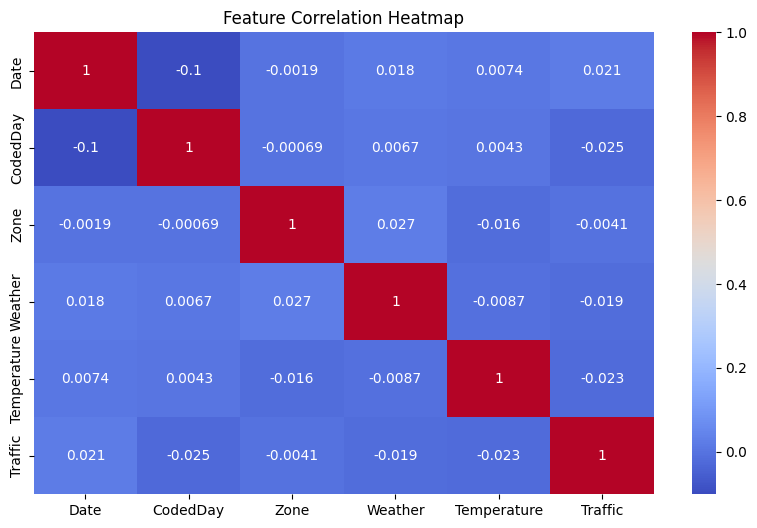

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the non-numerical column 'Day' for correlation calculation
numeric_dataset = dataset.drop(columns=['Day'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


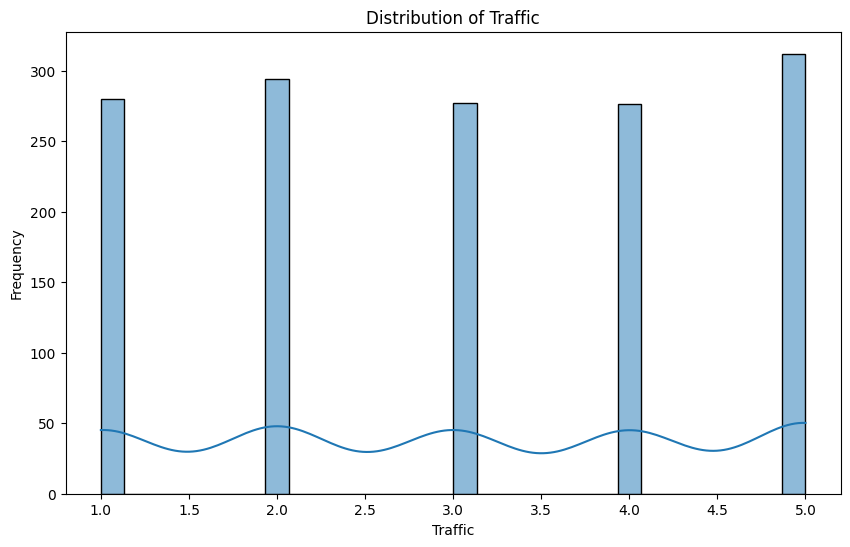

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Traffic'], kde=True, bins=30)
plt.title('Distribution of Traffic')
plt.xlabel('Traffic')
plt.ylabel('Frequency')
plt.show()


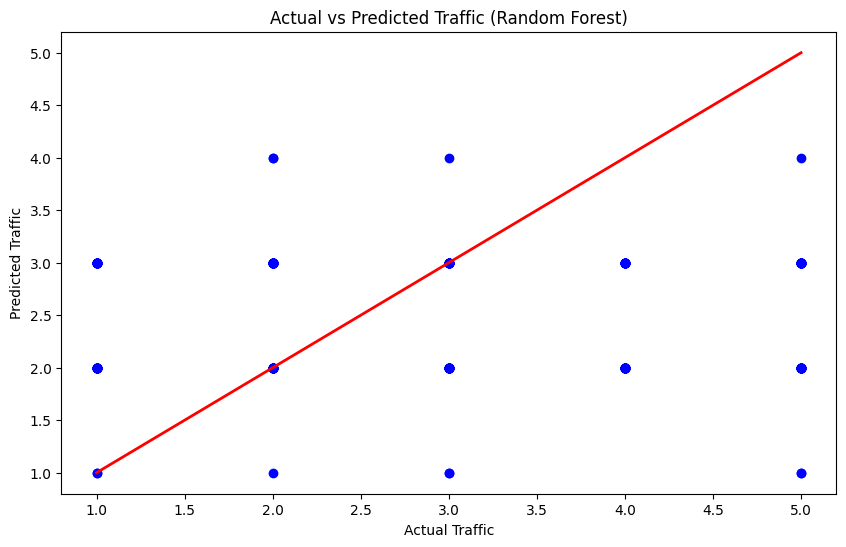

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Traffic (Random Forest)')
plt.xlabel('Actual Traffic')
plt.ylabel('Predicted Traffic')
plt.show()


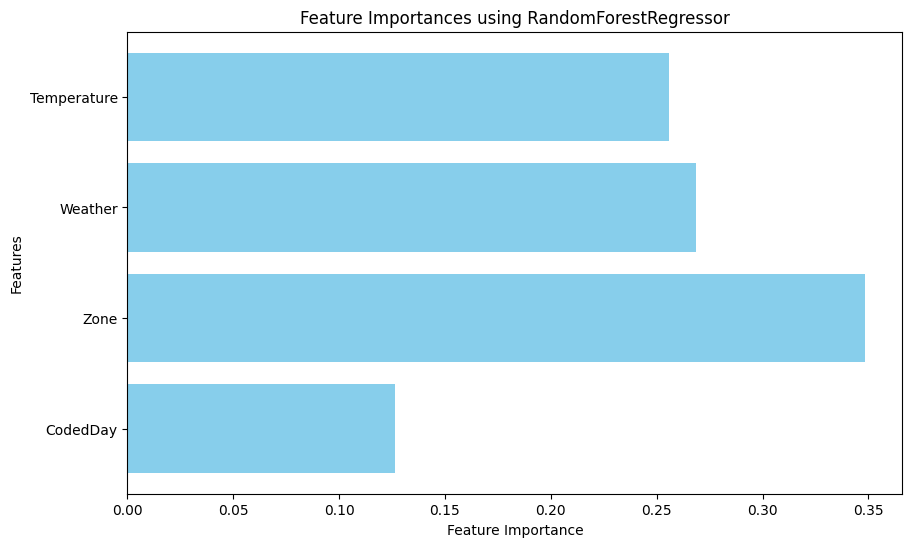

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Re-train the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=0)
rf_regressor.fit(X_train, y_train.ravel())

# Extract feature importances
feature_importance = rf_regressor.feature_importances_
features = dataset.columns[2:6]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances using RandomForestRegressor')
plt.show()



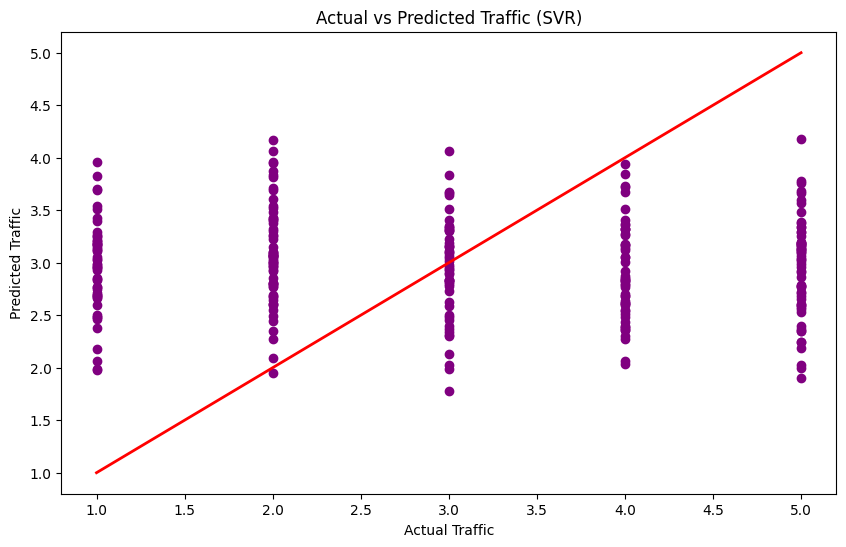

In [25]:
y_pred_svr = regressor.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Traffic (SVR)')
plt.xlabel('Actual Traffic')
plt.ylabel('Predicted Traffic')
plt.show()
